# STAT 207 Project 02 - Daytime VS Nighttime Collisions

YOUR NAMES

## 1. Introduction

Hypothesis Task

We are interested in looking for evidence to refute the claim that the same amount of collisions occur in the daytime than in the nighttime. Our claim is that there are more collision in the day time than in the night time. To do this, we will perform hypthesis test and look at the difference in proportion for daytime collisions, defined as 7 am to 7 pm, and nighttime collisions, defined as 7 pm to 7 am.

Confidence Interval Task

We are interested in the true proportion of all fatal car crashes that occur in Monroe County. To do this, we will set up a 95% confidence interval to suggest that we are 95% confident that the true proportion of fatal car crashes that occur in Monroe County is within our interval. Since we have a representative sample, we will have to take a resample of the sample data with replacement, take the proportion of fatal collisions, save it, and then repeat various times so that we can create a sampling distribution that should closely resemble a normal curve. From there we can take calculate our 95% confidence interval.

null = proportion day = proportion night

alt = proportion day > proportion night

In [223]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv("cleaned_monroe_crash_data.csv")
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [225]:
df['Injury Type'].value_counts()

No injury/unknown     41603
Non-incapacitating    11136
Incapacitating         1089
Fatal                   115
Name: Injury Type, dtype: int64

## 2. Confidence Interval Analytical Tasks

In [226]:
# Interested in Injury Type only
df_injury = df[['Injury Type']]

In [227]:
# No cleaning necessary
df_injury.isna().sum()

Injury Type    0
dtype: int64

In [228]:
df_injury['Injury Type'].unique()

array(['No injury/unknown', 'Non-incapacitating', 'Incapacitating',
       'Fatal'], dtype=object)

In [229]:
df_injury.shape

(53943, 1)

In [230]:
(df_injury == 'Fatal').mean()

Injury Type    0.002132
dtype: float64

In [231]:
samp_dist = []
for i in range(10000):
    sample_proportion = (df_injury.sample(53943, replace = True) == 'Fatal').mean().iloc[0]
    d = {"proportion_fatal" : sample_proportion}
    samp_dist.append(d)

In [232]:
samp_dist = pd.DataFrame(samp_dist)
samp_dist

,proportion_fatal
0,0.001835
1,0.002428
2,0.002354
3,0.001872
4,0.002354
...,...
9995,0.002187
9996,0.002150
9997,0.002021
9998,0.002169


array([[<Axes: title={'center': 'proportion_fatal'}>]], dtype=object)

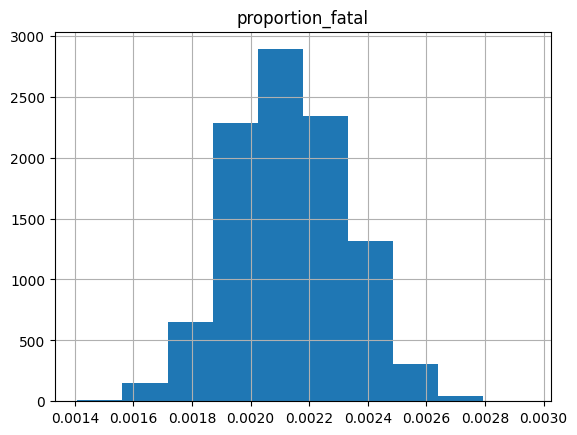

In [233]:
samp_dist.hist()

In [234]:
print(f"Lower Bound: {100*np.quantile(samp_dist, .025)}")

Lower Bound: 0.17425801308788907


In [235]:
print(f"Higher Bound: {100*np.quantile(samp_dist, .975)}")

Higher Bound: 0.2521179763824778


We are 95% confident that the true proportion of fatal car crashes that occur in Monroe County is within 0.174% and 0.25% of car crashes.

## 3. Hypothesis Testing Analytical Tasks

In [236]:
df_hour = df[['Hour']]
df_hour.dtypes

Hour    float64
dtype: object

In [237]:
df_hour['Hour'].unique()

array([   0., 1500., 2300.,  900., 1100., 1800., 1200., 1400., 1600.,
       1700., 1300.,  700., 2100., 2000., 1900.,  400., 1000.,  600.,
        800., 2200.,  100.,  200.,  300.,  500.,   nan])

In [238]:
df_hour.isna().sum()

Hour    225
dtype: int64

In [239]:
df_hour = df_hour.dropna()

In [240]:
df_hour.isna().sum()

Hour    0
dtype: int64

In [241]:
def DoN(Hour):
    if 700 < Hour < 1900:
        return True
    else:
        return False

In [242]:
df_hour['Daytime?'] = df_hour['Hour'].apply(DoN)

In [243]:
df_hour.head()

,Hour,Daytime?
0,0.0,False
1,1500.0,True
2,2300.0,False
3,900.0,True
4,1100.0,True


In [244]:
df_hour['Daytime?'].value_counts(normalize= 'index')

True     0.701701
False    0.298299
Name: Daytime?, dtype: float64

In [245]:
(df_hour['Daytime?'] == True).mean() - (df_hour['Daytime?'] == False).mean()

0.40340295617856214

In [246]:
# Assuming the skeptic's claim is true, then the daytime and nighttime collisions will have the same proportion (50-50). If that is the case, then 

## 4. Conclusion